**Trees and tree algorithms**

https://runestone.academy/runestone/books/published/pythonds/Trees/toctree.html

# Objectives

- To understand what a tree data structure is and how it is used.
- To see how trees can be used to implement a map data structure.
- To implement trees using a list.
- To implement trees using classes and references.
- To implement trees as a recursive data structure.
- To implement a priority queue using a heap.

# Examples of trees

Now that we have studied linear data structures like stacks and queues and have some experience with recursion, we will look at a common data structure called the tree. Trees are used in many areas of computer science, including operating systems, graphics, database systems, and computer networking. Tree data structures have many things in common with their botanical cousins. A tree data structure has a root, branches, and leaves. The difference between a tree in nature and a tree in computer science is that a tree data structure has its root at the top and its leaves on the bottom.

Properties of trees:
1. **Trees are hierarchical.** By hierarchical, we mean that trees are structured in layers with the more general things near the top and the more specific things near the bottom.
2. **All of the children of one node are independent of the children of another node.**
3. **Each leaf node is unique.**
4. (derived from hierarchical nature) **You can move entire sections of a tree (called a subtree) to a different position in the tree without affecting the lower levels of the hierarchy**


Examples:
- Biological classification of animals
- Unix file system
- Web page, like HTML tags

# Vocabulary and definitions

**Node**
A node is a fundamental part of a tree. It can have a name, which we call the “key.” A node may also have additional information. We call this additional information the “payload.” While the payload information is not central to many tree algorithms, it is often critical in applications that make use of trees.

**Edge**
An edge is another fundamental part of a tree. An edge connects two nodes to show that there is a relationship between them. Every node (except the root) is connected by exactly one incoming edge from another node. Each node may have several outgoing edges.

**Root**
The root of the tree is the only node in the tree that has no incoming edges. In Figure Figure 2, / is the root of the tree.

**Path**
A path is an ordered list of nodes that are connected by edges. For example, Mammal → Carnivora → Felidae → Felis → Domestica is a path.

**Children**
The set of nodes 𝑐 that have incoming edges from the same node to are said to be the children of that node. In Figure Figure 2, nodes log/, spool/, and yp/ are the children of node var/.

**Parent**
A node is the parent of all the nodes it connects to with outgoing edges. In Figure 2 the node var/ is the parent of nodes log/, spool/, and yp/.

**Sibling**
Nodes in the tree that are children of the same parent are said to be siblings. The nodes etc/ and usr/ are siblings in the filesystem tree.

**Subtree**
A subtree is a set of nodes and edges comprised of a parent and all the descendants of that parent.

**Leaf Node**
A leaf node is a node that has no children. For example, Human and Chimpanzee are leaf nodes in Figure 1.

**Level**
The level of a node 𝑛 is the number of edges on the path from the root node to 𝑛. For example, the level of the Felis node in Figure 1 is five. By definition, the level of the root node is zero.

**Height**
The height of a tree is equal to the maximum level of any node in the tree. The height of the tree in Figure 2 is two.

With the basic vocabulary now defined, we can move on to a formal definition of a tree. In fact, we will provide two definitions of a tree. One definition involves nodes and edges. The second definition, which will prove to be very useful, is a recursive definition.

**Definition One:** A tree consists of a set of nodes and a set of edges that connect pairs of nodes. A tree has the following properties:

- One node of the tree is designated as the root node.
- Every node 𝑛, except the root node, is connected by an edge from exactly one other node 𝑝, where 𝑝 is the parent of 𝑛.
- A unique path traverses from the root to each node.
- If each node in the tree has a maximum of two children, we say that the tree is a binary tree.

Figure 3 illustrates a tree that fits definition one. The arrowheads on the edges indicate the direction of the connection.

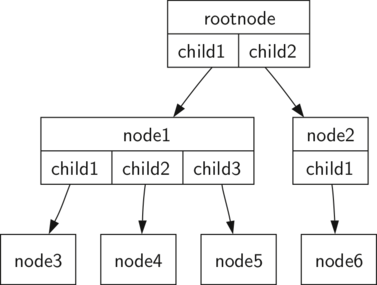

Figure 3: A Tree Consisting of a Set of Nodes and Edges

**Definition Two:** A tree is either empty or consists of a root and zero or more subtrees, each of which is also a tree. The root of each subtree is connected to the root of the parent tree by an edge. Figure 4 illustrates this recursive definition of a tree. Using the recursive definition of a tree, we know that the tree in Figure 4 has at least four nodes, since each of the triangles representing a subtree must have a root. It may have many more nodes than that, but we do not know unless we look deeper into the tree.

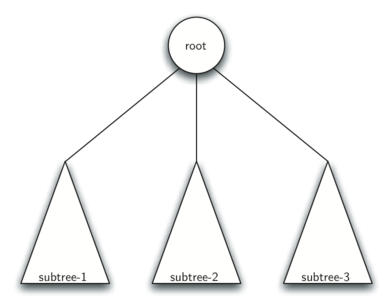

Figure 4: A recursive Definition of a tree

# List of lists representation

In a tree represented by a list of lists, we will begin with Python’s list data structure and write the functions defined above. Although writing the interface as a set of operations on a list is a bit different from the other abstract data types we have implemented, it is interesting to do so because it provides us with a simple recursive data structure that we can look at and examine directly. In a list of lists tree, we will store the value of the root node as the first element of the list. The second element of the list will itself be a list that represents the left subtree. The third element of the list will be another list that represents the right subtree. To illustrate this storage technique, let’s look at an example. Figure 1 shows a simple tree and the corresponding list implementation.

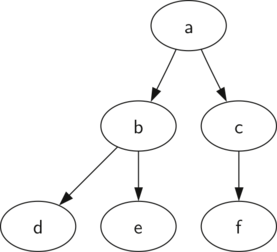

In [1]:
myTree = ['a',   #root
      ['b',  #left subtree
       ['d', [], []],
       ['e', [], []] ],
      ['c',  #right subtree
       ['f', [], []],
       [] ]
     ]

Notice that we can access subtrees of the list using standard list indexing. 

In [7]:
print(myTree)

['a', ['b', ['d', [], []], ['e', [], []]], ['c', ['f', [], []], []]]


In [8]:
print('root = ', myTree[0])

root =  a


In [9]:
print('left subtree = ', myTree[1])

left subtree =  ['b', ['d', [], []], ['e', [], []]]


In [10]:
print('right subtree = ', myTree[2])

right subtree =  ['c', ['f', [], []], []]


One very nice property of this list of lists approach is that the structure of a list representing a subtree adheres to the structure defined for a tree; the structure itself is recursive! A subtree that has a root value and two empty lists is a leaf node. Another nice feature of the list of lists approach is that it generalizes to a tree that has many subtrees. In the case where the tree is more than a binary tree, another subtree is just another list.

Let’s formalize this definition of the tree data structure by providing some functions that make it easy for us to use lists as trees. Note that we are not going to define a binary tree class. The functions we will write will just help us manipulate a standard list as though we are working with a tree.

In [11]:
def BinaryTree(r):
    return [r, [], []]

In [12]:
BinaryTree(2)

[2, [], []]

The BinaryTree function simply constructs a list with a root node and two empty sublists for the children. To add a left subtree to the root of a tree, we need to insert a new list into the second position of the root list. We must be careful. If the list already has something in the second position, we need to keep track of it and push it down the tree as the left child of the list we are adding. Listing 1 shows the Python code for inserting a left child.

In [13]:
def insertLeft(root,newBranch):
    t = root.pop(1)
    if len(t) > 1:
        root.insert(1,[newBranch,t,[]])
    else:
        root.insert(1,[newBranch, [], []])
    return root

Notice that to insert a left child, we first obtain the (possibly empty) list that corresponds to the current left child. We then add the new left child, installing the old left child as the left child of the new one. This allows us to splice a new node into the tree at any position. The code for insertRight is similar to insertLeft and is shown in Listing 2.

In [15]:
def insertRight(root,newBranch):
    t = root.pop(2)
    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
    else:
        root.insert(2,[newBranch,[],[]])
    return root

To round out this set of tree-making functions(see Listing 3), let’s write a couple of access functions for getting and setting the root value, as well as getting the left or right subtrees.

In [16]:
def getRootVal(root):
    return root[0]

def setRootVal(root,newVal):
    root[0] = newVal

def getLeftChild(root):
    return root[1]

def getRightChild(root):
    return root[2]

In [23]:
r = BinaryTree(3)
insertLeft(r,4)
insertLeft(r,5)

[3, [5, [4, [], []], []], []]

In [24]:
insertRight(r,6)
insertRight(r,7)
l = getLeftChild(r)
print(l)

[5, [4, [], []], []]


In [25]:
setRootVal(l,9)
print(r)

[3, [9, [4, [], []], []], [7, [], [6, [], []]]]


In [26]:
insertLeft(l,11)
print(r)

[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]


In [27]:
print(getRightChild(getRightChild(r)))

[6, [], []]


## Exercise

Write a function buildTree that returns a tree using the list of lists functions that looks like this:

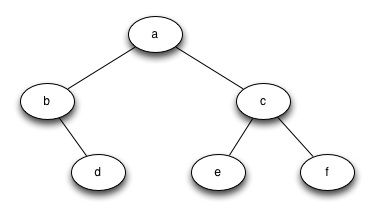

In [28]:
t = BinaryTree('a')
insertLeft(t,'b')
insertRight(t,'c')
insertLeft(getLeftChild(t),'d')
insertLeft(getRightChild(t),'e')
insertRight(getRightChild(t),'f')

['c', ['e', [], []], ['f', [], []]]

In [31]:
for i, v in enumerate(t):
    print(i, v)

0 a
1 ['b', ['d', [], []], []]
2 ['c', ['e', [], []], ['f', [], []]]


From above: **A subtree that has a root value and two empty lists is a leaf node.**

# Nodes and references

Our second method to represent a tree uses nodes and references. In this case we will define a class that has attributes for the root value, as well as the left and right subtrees. **Since this representation more closely follows the object-oriented programming paradigm, we will continue to use this representation for the remainder of the chapter.**

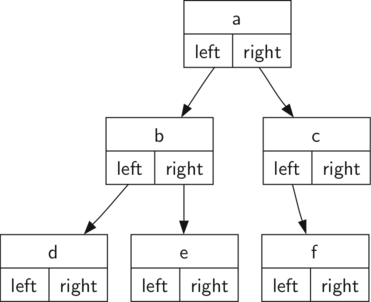

Figure 2: A Simple Tree Using a Nodes and References Approach

A simple class definition for the nodes and references approach.

The important thing to remember about this representation is that the attributes `left` and `right` will become references to other instances of the `BinaryTree` class. For example, when we insert a new left child into the tree we create another instance of `BinaryTree` and modify `self.leftChild` in the root to reference the new tree.

For testing and learning of the class below, I did the following in order, which may not reflect the class.

- I first started with the main function.
- Then I tried to understand the logic of inserting the left node.
- I jumped ahead to learning how to getRootVal and setRootVal so that I can check my insertion.
- Then I implemented the right insertion which is the same logic.

In [74]:
class BinaryTree:
    def __init__(self,rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None
        
    # Inserting left node and checking - see notes below
    def insertLeft(self, newNode):
        
        # If the left child is empty
        if self.leftChild == None:                  
            self.leftChild = BinaryTree(newNode)     # Note how a new tree is being called here
        
        # If the left child has a value, push the previous value down
        else:              
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
            
    # Moving through a tree to desired value
    def setRootVal(self, obj):
        self.key = obj
        
    # Root value - can be used for printing where you are
    def getRootVal(self):
        return self.key      # Refers to the __init__ function
    
    # Inserting right node - same implementation of logic as above
    def insertRight(self, newNode):
        
        # If the right child is empty
        if self.rightChild == None:                  
            self.rightChild = BinaryTree(newNode)
        
        # If the right child has a value, push the previous value down
        else:              
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t
            
            
    # Instead of moving, you can use these functions to get the left and right children
    # from the node you are in, but you still need to use getRootVal
    
    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

## Inserting the left node

In [208]:
# Case where the left child is empty
tree = BinaryTree('a')
print('Node before left insertion: ', tree.getRootVal())

tree.insertLeft('b')

# Move down and to the left
tree.setRootVal('b')
print('Node after insertion to left and moving: ', tree.getRootVal())

tree.insertLeft('d')
print('Node after insertion to left and not moving: ', tree.getLeftChild().getRootVal())



Node before left insertion:  a
Node after insertion to left and moving:  b
Node after insertion to left and not moving:  d


## Insertion of right node (same as above)

In [76]:
# Move up
tree.setRootVal('a')

In [77]:
tree.insertRight('c')

In [78]:
print('Node after moving up and inserting right (not moving to new node):', tree.getRootVal())

Node after moving up and inserting right (not moving to new node): a


In [83]:
print('Getting right node without moving:')
print(tree.getRightChild().getRootVal())

Getting right node without moving:
c


## Exercise

Write a function that returns a tree using nodes and references implementation. (same diagram as the trees by list representation)

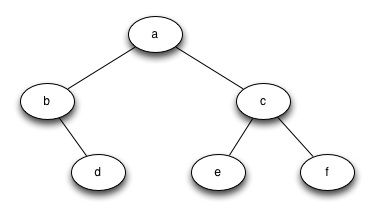

In [209]:
tree2 = BinaryTree('a')

In [210]:
tree2.insertLeft('b')

In [211]:
# This below is wrong - it does NOT move and insert a right child
# tree.getLeftChild().insertRight('d')

# tree.getRootVal()
# tree.getLeftChild().getRootVal()

In [212]:
tree2.setRootVal('b')
tree2.insertRight('d')

In [213]:
# Move back up
tree2.setRootVal('a')

In [214]:
tree2.getRootVal()

'a'

In [215]:
tree2.insertRight('c')
tree2.setRootVal('c')

In [216]:
tree2.getRootVal()

'c'

In [217]:
tree2.insertLeft('e')
tree2.insertRight('f')

In [218]:
tree2.getRightChild().getRootVal()

'f'

In [219]:
# Move back up
tree2.setRootVal('a')

In [220]:
tree2.getRootVal()

'a'

In [221]:
# Traverse the tree to print
print('Start at root: ', tree2.getRootVal())
print('Move left')
tree2.setRootVal('b')
# tree2.setRootVal('c')
print('Print the left node: ', tree2.getRootVal())
print('Print the child of the left node: ', tree2.getRightChild().getRootVal())
# print('Print the child of the left node: ', tree.getRootVal())

# print('Move back up to the master root')
# tree.setRootVal('a')
# print('Check right without moving nodes')
# print('Print the right child from the master root node: ', tree.getRightChild().getRootVal())
# print('Print the grandchildren of the right child from the master root node: \n', 
#       'left grandchild of c: ', tree.getRightChild().getLeftChild().getRootVal(), '\n',
#       'right grandchild of c: ', tree.getRightChild().getRightChild().getRootVal())


Start at root:  a
Move left
Print the left node:  b
Print the child of the left node:  f


In [115]:
# Runestone test


r = BinaryTree('a')
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')
print(r.getLeftChild())
print(r.getLeftChild().getRootVal())
r.insertRight('c')
print(r.getRightChild())
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello')
print(r.getRightChild().getRootVal())


a
None
b
c
hello


# Parse tree

With the implementation of our tree data structure complete, we now look at an example of how a tree can be used to solve some real problems. In this section we will look at parse trees. Parse trees can be used to represent real-world constructions like sentences or mathematical expressions.

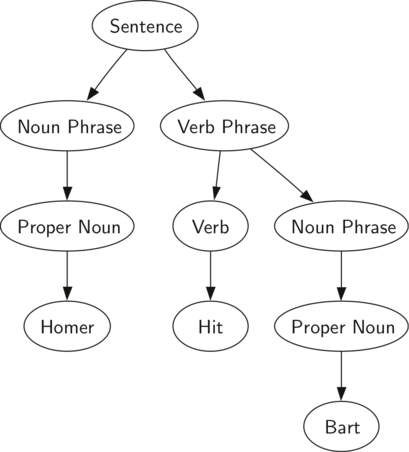

Figure 1 shows the hierarchical structure of a simple sentence. Representing a sentence as a tree structure allows us to work with the individual parts of the sentence by using subtrees.

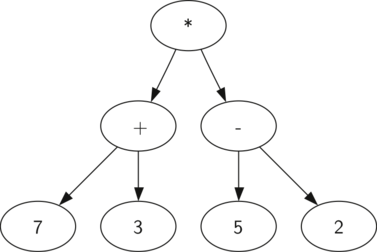

We can also represent a mathematical expression such as ((7+3)∗(5−2)) as a parse tree, as shown in Figure 2. We have already looked at fully parenthesized expressions, so what do we know about this expression? We know that multiplication has a higher precedence than either addition or subtraction. Because of the parentheses, we know that before we can do the multiplication we must evaluate the parenthesized addition and subtraction expressions. The hierarchy of the tree helps us understand the order of evaluation for the whole expression. Before we can evaluate the top-level multiplication, we must evaluate the addition and the subtraction in the subtrees. The addition, which is the left subtree, evaluates to 10. The subtraction, which is the right subtree, evaluates to 3. Using the hierarchical structure of trees, we can simply replace an entire subtree with one node once we have evaluated the expressions in the children.

In the rest of this section we are going to examine parse trees in more detail. In particular we will look at

How to build a parse tree from a fully parenthesized mathematical expression.

How to evaluate the expression stored in a parse tree.

How to recover the original mathematical expression from a parse tree.

The first step in building a parse tree is to break up the expression string into a list of tokens. There are four different kinds of tokens to consider: left parentheses, right parentheses, operators, and operands. We know that whenever we read a left parenthesis we are starting a new expression, and hence we should create a new tree to correspond to that expression. Conversely, whenever we read a right parenthesis, we have finished an expression. We also know that operands are going to be leaf nodes and children of their operators. Finally, we know that every operator is going to have both a left and a right child.

Using the information from above we can define four rules as follows:

If the current token is a '(', add a new node as the left child of the current node, and descend to the left child.

If the current token is in the list ['+','-','/','*'], set the root value of the current node to the operator represented by the current token. Add a new node as the right child of the current node and descend to the right child.

If the current token is a number, set the root value of the current node to the number and return to the parent.

If the current token is a ')', go to the parent of the current node.

Other info not captured here.

# Tree Traversals

Now that we have examined the basic functionality of our tree data structure, it is time to look at some additional usage patterns for trees. These usage patterns can be divided into the three ways that we access the nodes of the tree. There are three commonly used patterns to visit all the nodes in a tree. The difference between these patterns is the order in which each node is visited. We call this visitation of the nodes a “traversal.” The three traversals we will look at are called preorder, inorder, and postorder. Let’s start out by defining these three traversals more carefully, then look at some examples where these patterns are useful.


**pre/in/post refers to when the root node is visited.**

**preorder**
In a preorder traversal, we visit the root node first, then recursively do a preorder traversal of the left subtree, followed by a recursive preorder traversal of the right subtree. (Example: reading a book in order).
- root node
- recursive left
- recursive right

**inorder**
In an inorder traversal, we recursively do an inorder traversal on the left subtree, visit the root node, and finally do a recursive inorder traversal of the right subtree.
- recursive left
- root node
- recursive right

**postorder**
In a postorder traversal, we recursively do a postorder traversal of the left subtree and the right subtree followed by a visit to the root node.
- recursive left
- recursive right
- root node


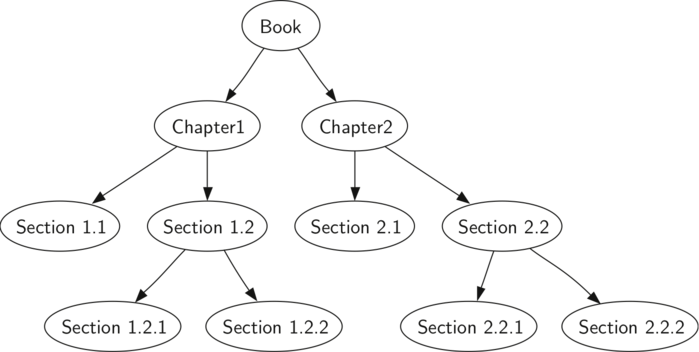


Suppose that you wanted to read this book from front to back. The preorder traversal gives you exactly that ordering. Starting at the root of the tree (the Book node) we will follow the preorder traversal instructions. We recursively call preorder on the left child, in this case Chapter1. We again recursively call preorder on the left child to get to Section 1.1. Since Section 1.1 has no children, we do not make any additional recursive calls. When we are finished with Section 1.1, we move up the tree to Chapter 1. At this point we still need to visit the right subtree of Chapter 1, which is Section 1.2. As before we visit the left subtree, which brings us to Section 1.2.1, then we visit the node for Section 1.2.2. With Section 1.2 finished, we return to Chapter 1. Then we return to the Book node and follow the same procedure for Chapter 2.

The code for writing tree traversals is surprisingly elegant, largely because the traversals are written recursively. Listing 2 shows the Python code for a preorder traversal of a binary tree.

**Q: What are the differences between preorder, inorder, and postorder traversals?**

# Priority queues with binary heaps

In earlier sections you learned about the first-in first-out data structure called a queue. One important variation of a queue is called a priority queue. **A priority queue acts like a queue in that you dequeue an item by removing it from the front. However, in a priority queue the logical order of items inside a queue is determined by their priority. The highest priority items are at the front of the queue and the lowest priority items are at the back. Thus when you enqueue an item on a priority queue, the new item may move all the way to the front.** We will see that the priority queue is a useful data structure for some of the graph algorithms we will study in the next chapter.

You can probably think of a couple of easy ways to implement a priority queue using sorting functions and lists. However, inserting into a list is 𝑂(𝑛) and sorting a list is 𝑂(𝑛log𝑛). We can do better. The classic way to implement a priority queue is using a data structure called a binary heap. A binary heap will allow us both enqueue and dequeue items in 𝑂(log𝑛).

The binary heap is interesting to study because when we diagram the heap it looks a lot like a tree, but when we implement it we use only a single list as an internal representation. The binary heap has two common variations: the min heap, in which the smallest key is always at the front, and the max heap, in which the largest key value is always at the front. In this section we will implement the min heap. We leave a max heap implementation as an exercise.

**Q: Why would you want to implement a binary heap?**

# Binary heap operations

The basic operations we will implement for our binary heap are as follows:

- BinaryHeap() creates a new, empty, binary heap.
- insert(k) adds a new item to the heap.
- findMin() returns the item with the minimum key value, leaving item in the heap.
- delMin() returns the item with the minimum key value, removing the item from the heap.
- isEmpty() returns true if the heap is empty, false otherwise.
- size() returns the number of items in the heap.
- buildHeap(list) builds a new heap from a list of keys.

# Binary heap implementation

## The structure property

## The heap order property

## Heap operations

# -- 